<div class="licence">
<span>Licence CC BY-NC-ND</span>
<span>Thierry Parmentelat &amp; Arnaud Legout</span>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

# l'ensemble de Mandelbrot

il s'agit de calculer l'image de la convergence de mandelbrot:

<img src="media/mandelbrot.svg">

## comment ça marche ?

* dans l'espace complexe, on définit pour chaque $c\in\mathbb{C}$ la suite
   * $z_0 = c$
   * $z_{n+1} = z_n^2 + c$
* on démontre que 
  * lorsque $|z_n|>2$, la suite diverge

il s'agit pour nous de 

* partir d'un pavé rectangulaire  
  par exemple sur la figure, on a pris l'habituel  
  $re \in [-2, 0.8]$ et  $im \in [-1.4, 1.4]$
* découper ce pavé en un maillage de $w \times h$ points  
  (sur la figure, 1000 x 1000)
* on se fixe un nombre maximal `max` d'itérations (disons 20)
  * et pour chaque point du maillage, on va calculer si la suite diverge avant `max` itérations
* c'est-à-dire plus spécifiquement on calcule un tableau `diverge` de la taille du maillage
  * pour chaque point `z`, on calcule les `max` premiers termes de la suite
  * et à la première itération `n` où la suite diverge (son module est supérieur à 2)  
    alors on affecte `diverge[z] = n`
* on n'a plus qu'à afficher ensuite l'image obtenue avec `plt.imshow`

*indices*

* pour fabriquer la grille des points de départ, 
  on pourra regarder `np.linspace` et `np.meshgrid`

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-10..210].


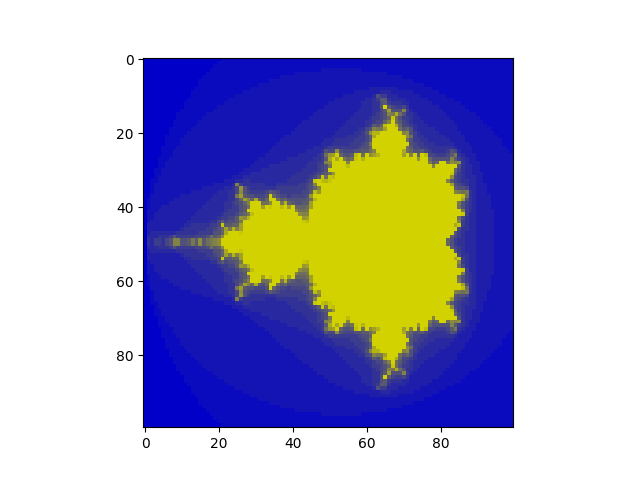

In [27]:
# Retourner lire le cours sur les images !!!
def mandelbrot(w, h, max_iter):
    re = np.linspace(-2,0.8,w)
    im = np.linspace(-1.4,1.4,h)
    diverge = np.array([[0 for a in re] for b in im])
    for i in range(w) :
        for j in range(h) :
            a=re[i]
            b=im[j]
            c = a + b*1j
            z=c
            iteration=0
            while abs(z)<=2 and iteration<=max_iter:
                z=z**2+c
                iteration+=1
            diverge[i,j]=iteration
    tableau = np.array([[[diverge[i,j]*10,diverge[i,j]*10,200-diverge[i,j]*10] for i in range(h)] for j in range(w)])
    return(tableau)

tab=mandelbrot(100,100,20)
plt.imshow(tab)
plt.show()

[[[120   1  36]
  [  0  94 201]
  [200 200 152]
  ...
  [201 201 201]
  [201 201 201]
  [201 201 201]]

 [[201 201 201]
  [201 201 201]
  [201 201 201]
  ...
  [201 201 201]
  [201 201 201]
  [201 201 201]]

 [[201 201 201]
  [201 201 201]
  [201 201 201]
  ...
  [201 201 201]
  [201 201 201]
  [201 201 201]]

 ...

 [[201 201 201]
  [201 201 201]
  [201 201 201]
  ...
  [201 201 201]
  [201 201 201]
  [201 201 201]]

 [[201 201 201]
  [201 201 201]
  [201 201 201]
  ...
  [201 201 201]
  [201 201 201]
  [201 201 201]]

 [[201 201 201]
  [201 201 201]
  [201 201 201]
  ...
  [201 201 201]
  [201 201 201]
  [201 201 201]]]


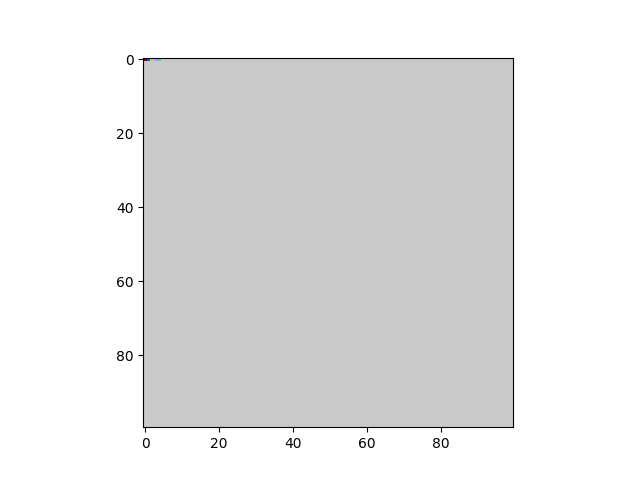

In [16]:
tab=np.empty(shape=(100,100,3),dtype='uint8')
tab +=200
print(tab)
plt.imshow(tab)
plt.show()

## v2

* on peut passer en paramètre à la fonction
  * le domaine en x et en y
  * le nombre maximum d'itérations
* on veut pouvoir produire une image (pour l'insérer dans l'énoncé par exemple)
  * quels formats sont disponibles ?
  * sauvez votre image dans un format vectoriel
  * affichez cette depuis votre notebook